In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/Colab Notebooks/Python/MLIP/

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/Python/MLIP


In [3]:
# read the data
df = pd.read_csv('MaxGetInsurance.csv')
# returns the first 5 rows
df.head()

,age,gender,bmi,kids,smoker,region,claims
0,19,female,27.900,0,yes,east,16884.92400
1,18,male,33.770,1,no,south,1725.55230
2,28,male,33.000,3,no,south,4449.46200
3,33,male,22.705,0,no,west,21984.47061
4,32,male,28.880,0,no,west,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1338 non-null   int64  
 1   gender  1338 non-null   object 
 2   bmi     1338 non-null   float64
 3   kids    1338 non-null   int64  
 4   smoker  1338 non-null   object 
 5   region  1338 non-null   object 
 6   claims  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Observations:**
*  3 columns contains categorical data & the remaining 4 are numerical


In [5]:
#duplicate copy
mgi = df.copy()

In [6]:
mgi.shape

(1338, 7)

There are 1338 rows & 7 columns

In [7]:
#converting objects & int(kids) to category
mgi = mgi.astype({"gender":'category', "smoker":'category', "region":'category',"kids":'category'})
mgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     1338 non-null   int64   
 1   gender  1338 non-null   category
 2   bmi     1338 non-null   float64 
 3   kids    1338 non-null   category
 4   smoker  1338 non-null   category
 5   region  1338 non-null   category
 6   claims  1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


In [8]:
#checking for missing data
mgi.isna().sum()

age       0
gender    0
bmi       0
kids      0
smoker    0
region    0
claims    0
dtype: int64

# **Observations:**
*  There is no missing data

In [9]:
mgi.describe(include='all')

,age,gender,bmi,kids,smoker,region,claims
count,1338.000000,1338,1338.000000,1338.0,1338,1338,1338.000000
unique,NaN,2,NaN,6.0,2,4,NaN
top,NaN,male,NaN,0.0,no,south,NaN
freq,NaN,676,NaN,574.0,1064,364,NaN
mean,39.207025,NaN,30.663397,NaN,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,NaN,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,NaN,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,NaN,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,NaN,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,NaN,NaN,NaN,16639.912515


# **Observations:**
*  There are 2 genders in the data set with Male being the most frequent with frequency of 676
*  Customers are havinge 6 categories of children from 0 to 5 in which most of the Customers do not have children
*  There are 2 types of customers: smokers & non-smokers with most of them being non-smokers
*  There are 4 regions of which south is the most frequent one
*  The average age of customers is 39.20 & standard deviation is 14.04. The minimum age is 18, 50% of the age of customers is below 39 and maximum is 64 years.
*  The average bmi of customers is 30.66 & standard deviation is 6.098. The minimum bmi is 15.96, 50% of the customer's bmi is below 30.4 and maximum is 64
*  The average claim of customers is 13270.422 & standard deviation is 12110. The minimum claim amount is 1121.87, upto 50% of the customer's claims are below 9382 and maximum claim amount is 63770.42

# **Exploring the Numerical Variables**

In [10]:
#Code for Box Plot and Dist Plot Combined
def histogram_boxplot(feature, figsize=(15,10), bins = None):
  f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, 
                                        gridspec_kw= {"height_ratios": (.25, .75)},
                                        figsize=figsize)
  sns.boxplot(feature, ax=ax_box2, showmeans=True, color= 'orange')
  sns.distplot(feature, kde=False, ax=ax_hist2)
  ax_hist2.axvline(np.mean(feature), color='g', linestyle='--')
  ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

**Note:** For better understanding using the describe function as well as the plots

In [11]:
#AGE
mgi['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

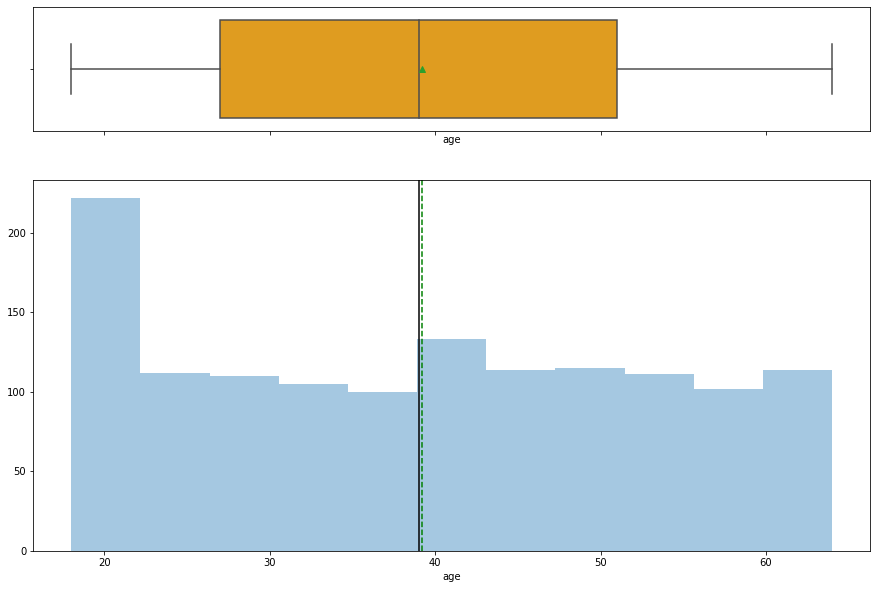

In [12]:
#AGE
histogram_boxplot(mgi['age'])
plt.show()

**Observations:**
*  One peak can be seen around the age 20. Apart from that the data looks uniformly distributed.
*  Mean and median is almost same that is around 39

In [13]:
#BMI
mgi['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

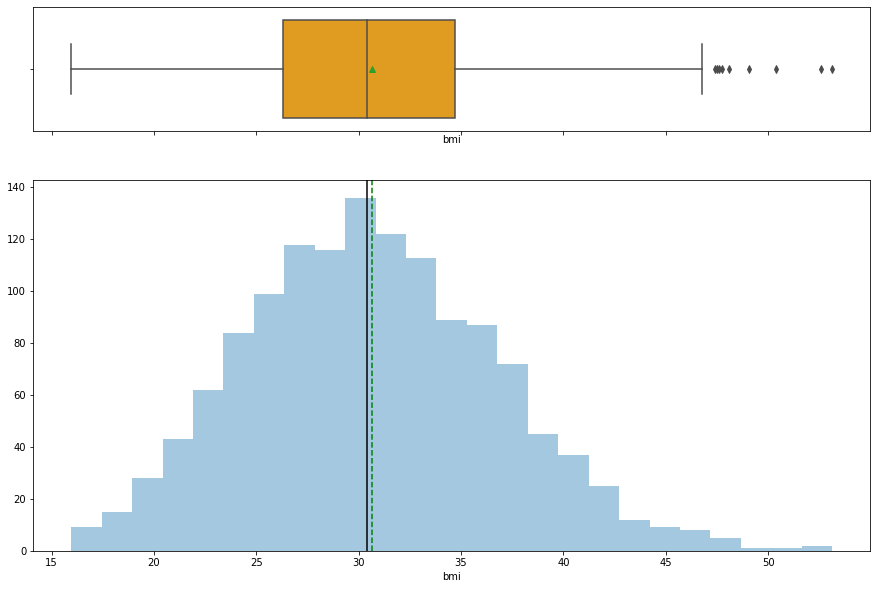

In [14]:
#BMI
histogram_boxplot(mgi['bmi'])
plt.show()

**Observations:**
*  BMI distribution is close to normal
*  Even this data has mean & median almost equal that is around 30
*  There are a few outliers in the bmi data with maximum bmi being 53.13

In [15]:
#CLAIMS
mgi['claims'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: claims, dtype: float64

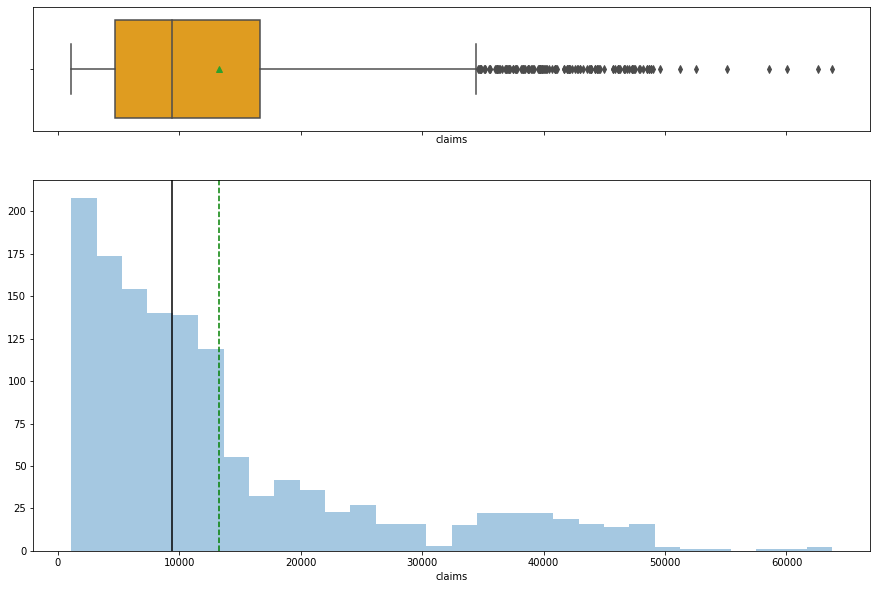

In [16]:
#CLAIMS
histogram_boxplot(mgi['claims'])
plt.show()

**Observations:**
*  The chart shows that it is right skewed with outliers
*  Max claim amount is 63770.42
*  75% of the claims are below 16640 & minimum being 1121.87

# **Exploring the Categorical Variables**

In [17]:
def bar_perc(plot, feature):

  total = len(feature)
  for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x,y), size = 12)

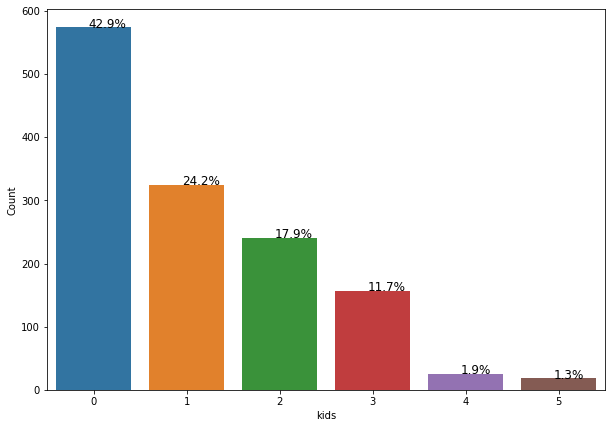

In [18]:
#Number of Kids
plt.figure(figsize=(10,7))
ax= sns.countplot(mgi['kids'])
plt.xlabel("kids")
plt.ylabel("Count")
bar_perc(ax,mgi['kids'])

**Observations:**
*  We can see that around 42.9% of the people in the data set do not have children.
*  24.2% people have 1 child
*  17.9% people have 2 children
* There are only 1.9% people with 4 children & 1.3% people with 5 children

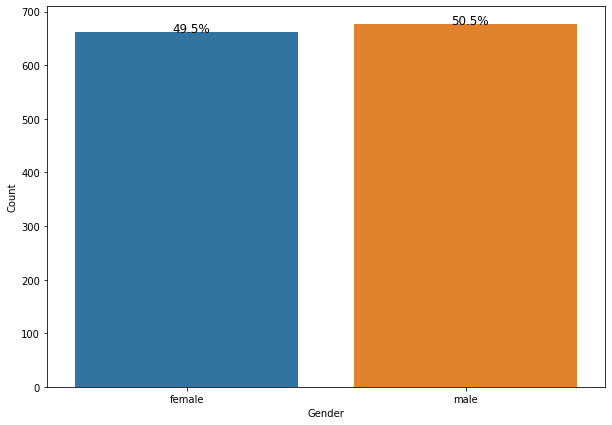

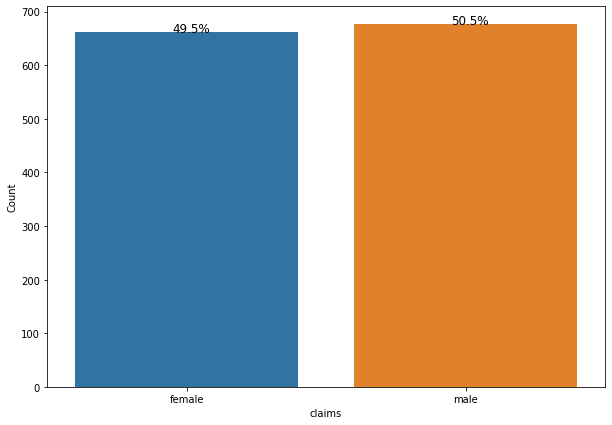

In [19]:
#Number of Males & Females in the dataset
plt.figure(figsize=(10,7))
ax= sns.countplot(mgi['gender'])
plt.xlabel("Gender")
plt.ylabel("Count")
bar_perc(ax,mgi['gender'])

#Claims made by Males & Females (It is same as the above)
plt.figure(figsize=(10,7))
ax= sns.countplot(mgi['gender'])
plt.xlabel("claims")
plt.ylabel("Count")
bar_perc(ax,mgi['smoker'])

**Observations:**
*  Because there are same number of males & females & every person has claimed we can see that the above 2 plots are same.

In [20]:
mgi = df.copy()

Text(0.5, 1.0, 'Smokers in the dataset')

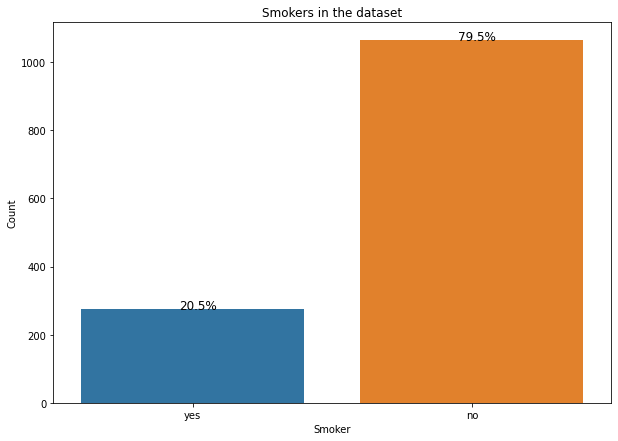

In [21]:
#Smokers & Non-smokers present in the dataset
plt.figure(figsize=(10,7))
ax= sns.countplot(mgi['smoker'])
plt.xlabel("Smoker")
plt.ylabel("Count")
bar_perc(ax,mgi['smoker'])
plt.title("Smokers in the dataset")

**Observations:**
*  We can see that only 20.5% of the people present in the dataset smoke and rest are non-smokers.

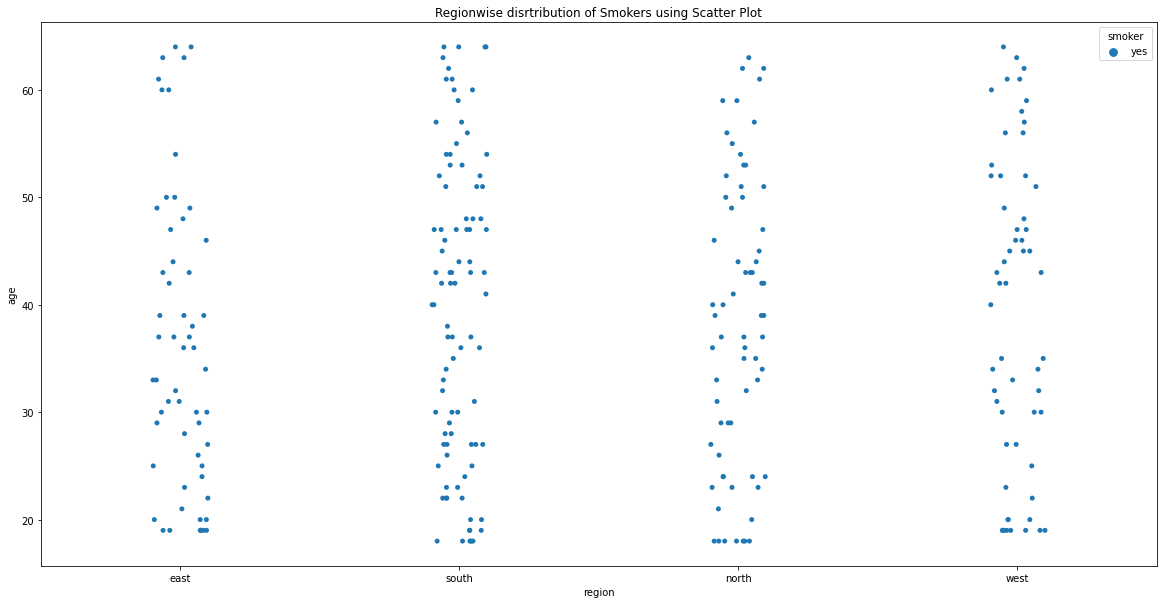

In [22]:
#Proportion of Smokers accross different regions
mgi = mgi[mgi['smoker']!='no'] #Dropping the Non-smokers
plt.figure(figsize=(20,10))
sns.stripplot(x='region', y='age', hue='smoker', data = mgi)
plt.title("Regionwise disrtribution of Smokers using Scatter Plot")
plt.show()

**Observations:**
*  From above scatter plot we can see that the smokers are present in almost all the age groups and we can see their distribution across all regions is almost similar.

In [23]:
#Genderwise distribution of smokers
pd.crosstab(mgi['smoker'], mgi['gender']).T

smoker,yes
gender,
female,115
male,159


Text(0.5, 1.0, 'Genderwise distribution of smokers')

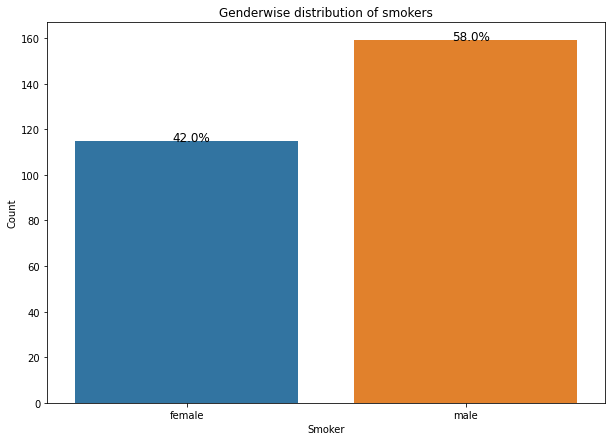

In [24]:
#Genderwise distribution of smokers
plt.figure(figsize=(10,7))
ax= sns.countplot(mgi['gender'])
plt.xlabel("Smoker")
plt.ylabel("Count")
bar_perc(ax,mgi['smoker'])
plt.title("Genderwise distribution of smokers")

**Observations:**
*  There are 42% (115) females & 58% (159) makes that smoke

In [25]:
#Regionwise distribution of smokers
pd.crosstab(mgi['smoker'], mgi['region']).T

smoker,yes
region,
east,58
north,67
south,91
west,58


Text(0.5, 1.0, 'Regionwise distribution of smokers')

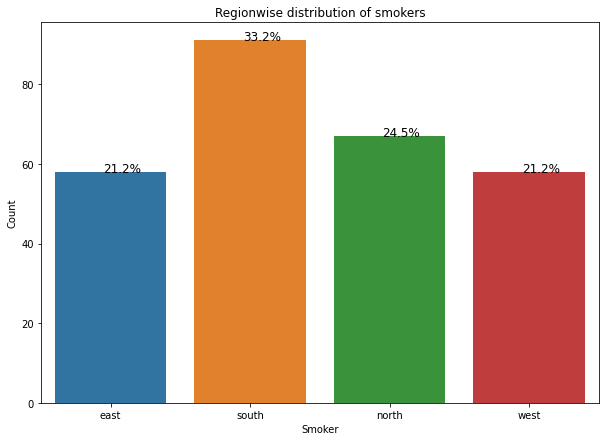

In [26]:
#Regionwise distribution of smokers
plt.figure(figsize=(10,7))
ax= sns.countplot(mgi['region'])
plt.xlabel("Smoker")
plt.ylabel("Count")
bar_perc(ax,mgi['smoker'])
plt.title("Regionwise distribution of smokers")

**Observations:**
*  From the above plot we can see that most of the smokers come from South region with 33.2% of total smoker's count.
*  Other 3 regions have almost same number of smokers

In [27]:
mgi = df.copy()

Text(0.5, 1.0, 'Regionwise distribution of People')

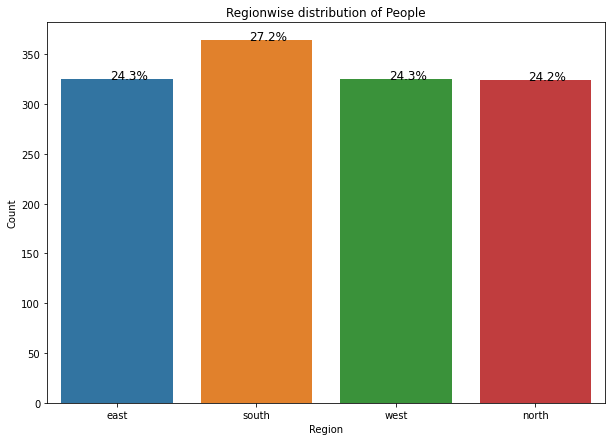

In [28]:
#Regionwise distribution of People & also the number of claims
plt.figure(figsize=(10,7))
ax= sns.countplot(mgi['region'])
plt.xlabel("Region")
plt.ylabel("Count")
bar_perc(ax,mgi['region'])
plt.title("Regionwise distribution of People")

**Observations:**
*  Among the 4 regions, the most of the people belong to the South region and the remaining 3 have almost same number of peoples

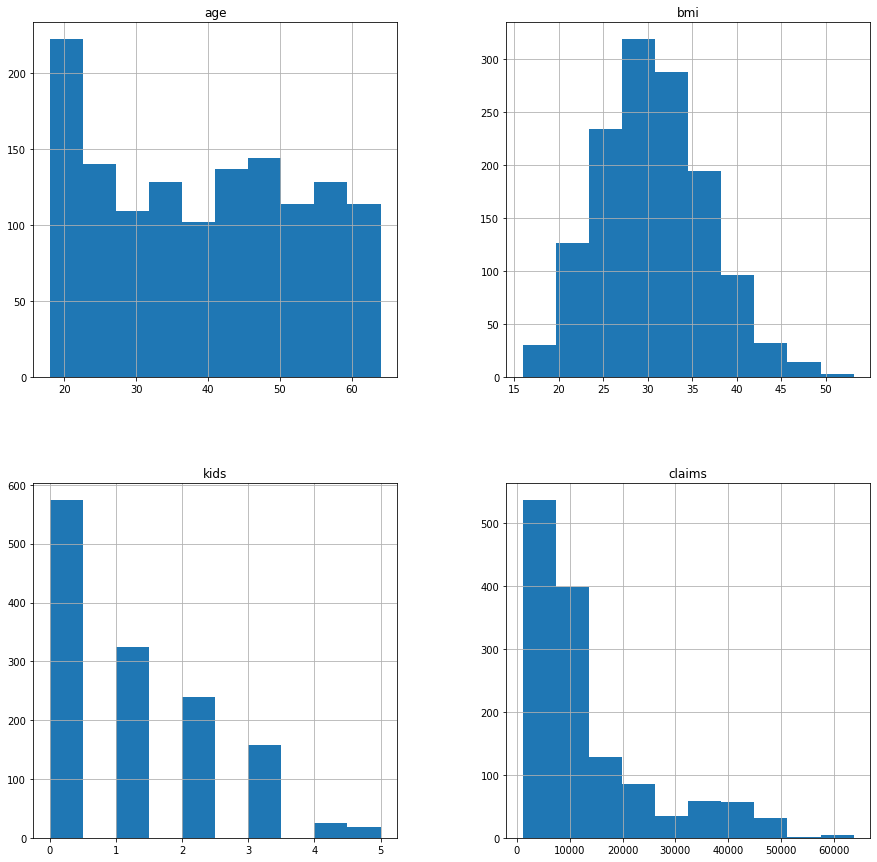

In [29]:
#Histogram Plot
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
mgi.hist(ax=ax)
plt.show()

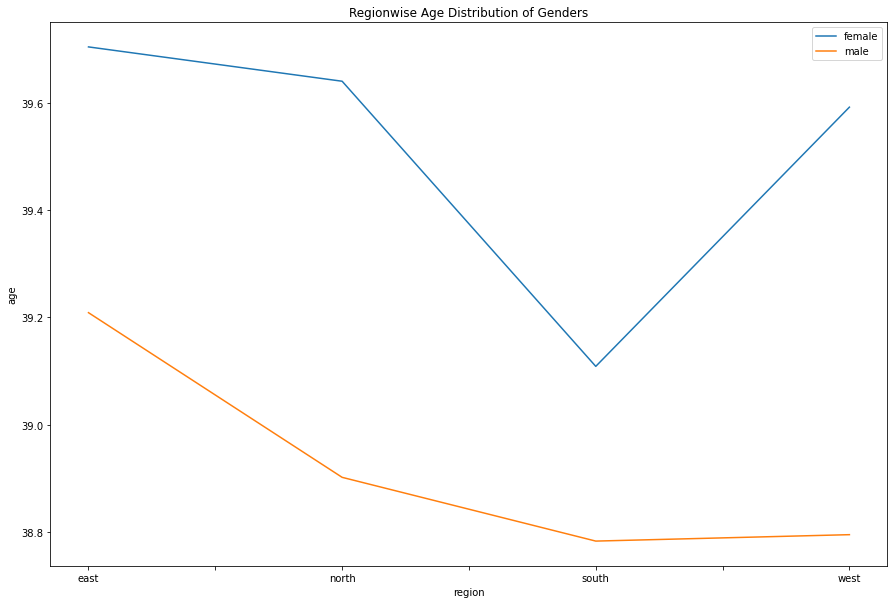

In [30]:
#Regionwise Age Distribution of Genders
fig, ax = plt.subplots(figsize=(15,10))

plt.style.use("seaborn-bright")

cust_grp_by_gen = mgi.groupby(['region','gender'])
cust_grp_by_gen.mean()['age'].unstack().plot(ax=ax)
plt.xlabel('region')
plt.ylabel('age')
plt.legend(loc="upper right")
plt.title("Regionwise Age Distribution of Genders")
plt.show()

**Observations:**
*  From above plot we can say that both Males & Females have mean age around 39.8 & 39.2 respectively in the East region which is highest among all the reigions and similary for South region it is  the lowest for both of them with the mean ages being around 39.2 & 38.8 respectively

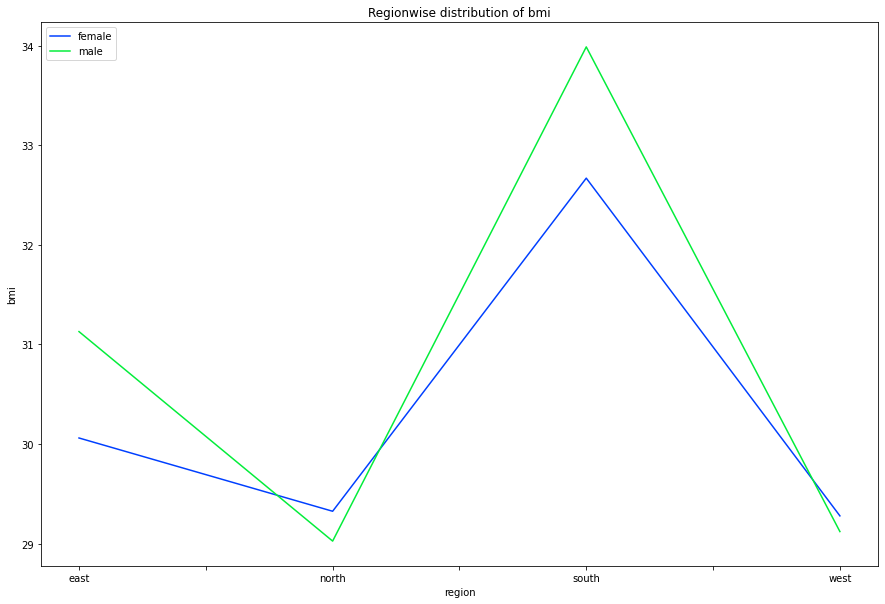

In [61]:
#Regionwise distribution of bmi using mean
fig, ax = plt.subplots(figsize=(15,10))

plt.style.use("seaborn-bright")

cust_grp_by_gen = mgi.groupby(['region','gender'])
cust_grp_by_gen.mean()['bmi'].unstack().plot(ax=ax)
plt.xlabel('region')
plt.ylabel('bmi')
plt.legend(loc="upper left")
plt.title("Regionwise distribution of bmi")
plt.show()

**Observations:**
*  We can see from the above plot that highest mean bmi for both males & females is from South region.
*  North and West region has almost same bmi

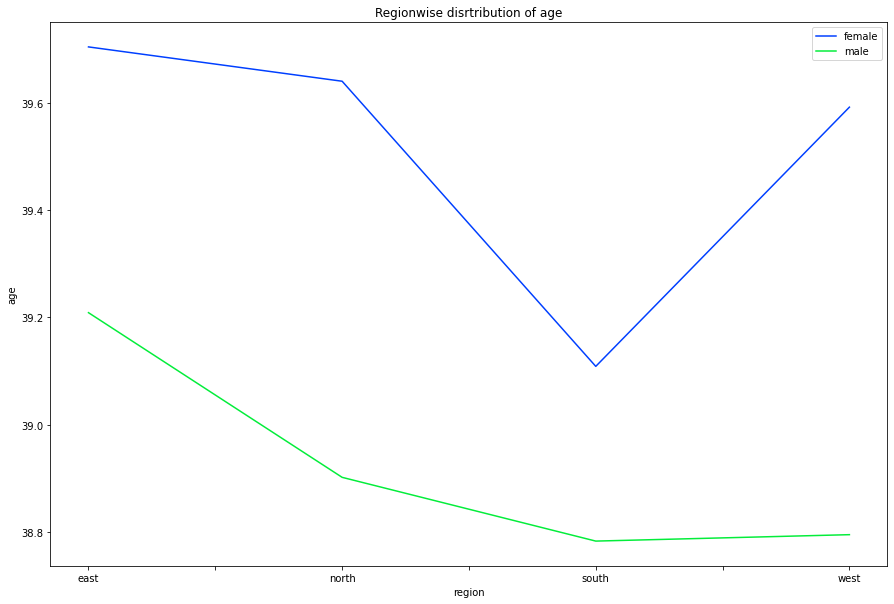

In [63]:
#Regionwise disrtribution of age using mean values
fig, ax = plt.subplots(figsize=(15,10))

plt.style.use("seaborn-bright")

cust_grp_by_gen = mgi.groupby(['region','gender'])
cust_grp_by_gen.mean()['age'].unstack().plot(ax=ax)
plt.xlabel('region')
plt.ylabel('age')
plt.legend(loc="upper right")
plt.title("Regionwise disrtribution of age")
plt.show()

**Observations:**
*  From the above plot we can see that in both Males & Females, the mean age is highest in the East region and lowest in the South region

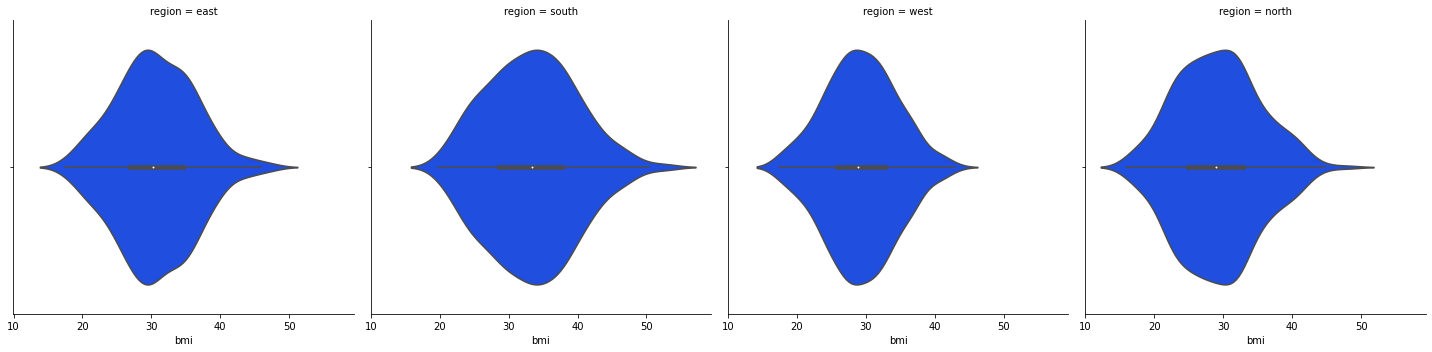

In [33]:
#Regionwise BMI Plot
sns.catplot(x='bmi', col='region', data=mgi, col_wrap=4, kind="violin")

Text(0.5, 1.0, 'Regionwise BMI distribution of Smokers & Non-smokers')

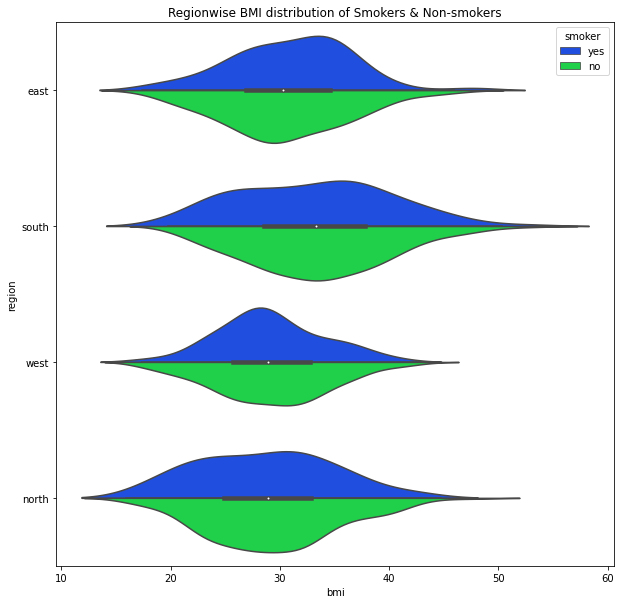

In [65]:
#Regionwise BMI distribution of Smokers & Non-smokers
plt.figure(figsize=(10,10))
sns.violinplot(x='bmi', y='region', data=mgi, hue='smoker', split=True)
plt.title("Regionwise BMI distribution of Smokers & Non-smokers")

Text(0.5, 1.0, 'Regionwise Age distribution of Smokers & Non-smokers')

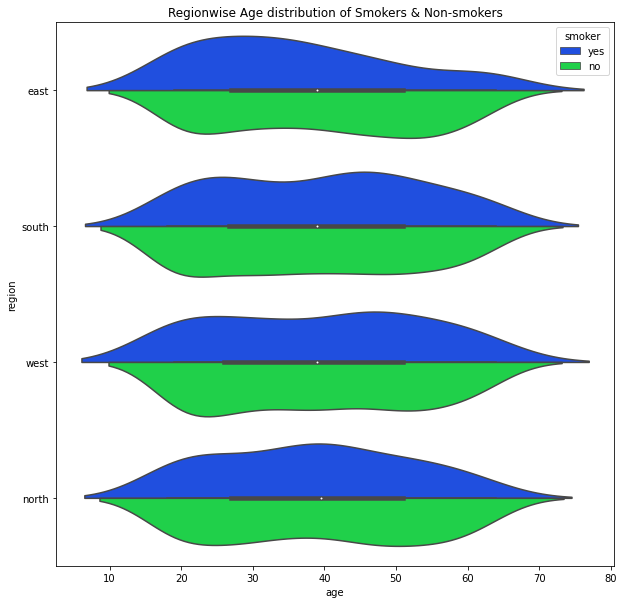

In [66]:
#Regionwise Age distribution of Smokers & Non-smokers
plt.figure(figsize=(10,10))
sns.violinplot(x='age', y='region', data=mgi, hue='smoker', split=True)
plt.title("Regionwise Age distribution of Smokers & Non-smokers")

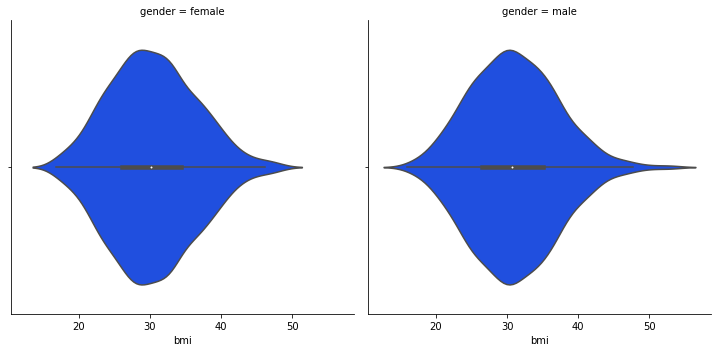

In [36]:
sns.catplot(x='bmi', col='gender', data=mgi, col_wrap=4, kind="violin")

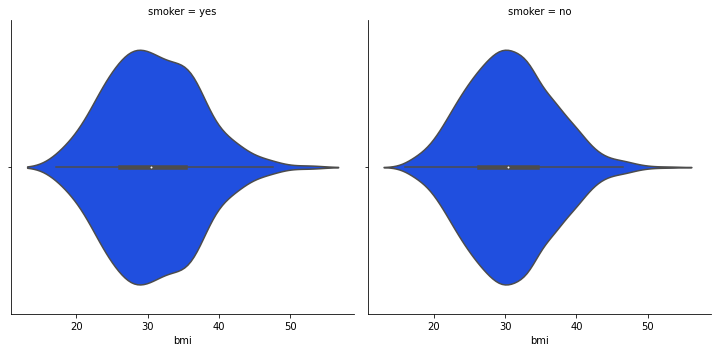

In [37]:
sns.catplot(x='bmi', col='smoker', data=mgi, col_wrap=4, kind="violin")

# **MultiVariate Analysis**

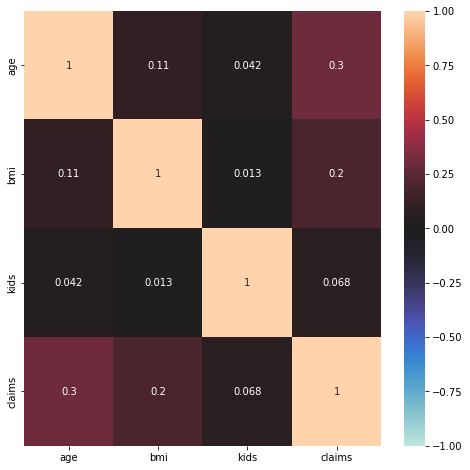

In [38]:
#Correlation Matrix

corr= mgi.corr()
plt.figure(figsize=(8,8))

sns.heatmap(corr, annot=True,
            cmap="icefire", vmax=1, vmin=-1,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

**Observations:**
1.   There seems no strong relation between kids & claims
2.   There seems no strong relation between age & kinds
3.   There is some relation between age & bmi
4.   There is strong relation between age & claims



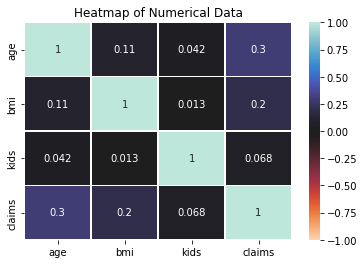

In [71]:
#Heatmap
sns.heatmap(data=mgi.corr(), annot=True,
            linewidth=0.5, cmap='icefire_r',cbar=True,
            vmax=1, vmin=-1)
plt.title("Heatmap of Numerical Data")
plt.show()

**Observations:**
It is similar to the correlation matrix

<Figure size 1728x1728 with 0 Axes>

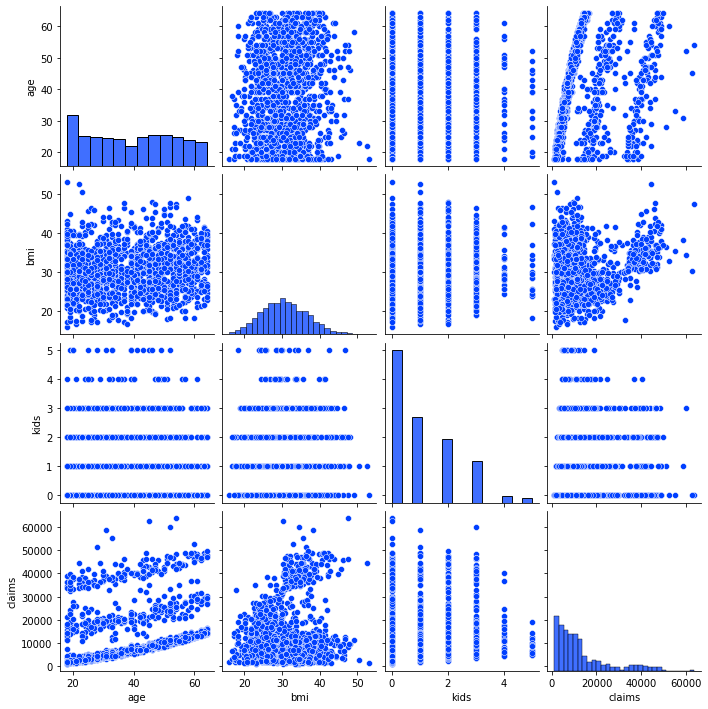

In [39]:
plt.figure(figsize=(24,24))
sns.pairplot(mgi)
plt.show()

Text(0.5, 1.0, 'Age VS BMI, Hue-Gender')

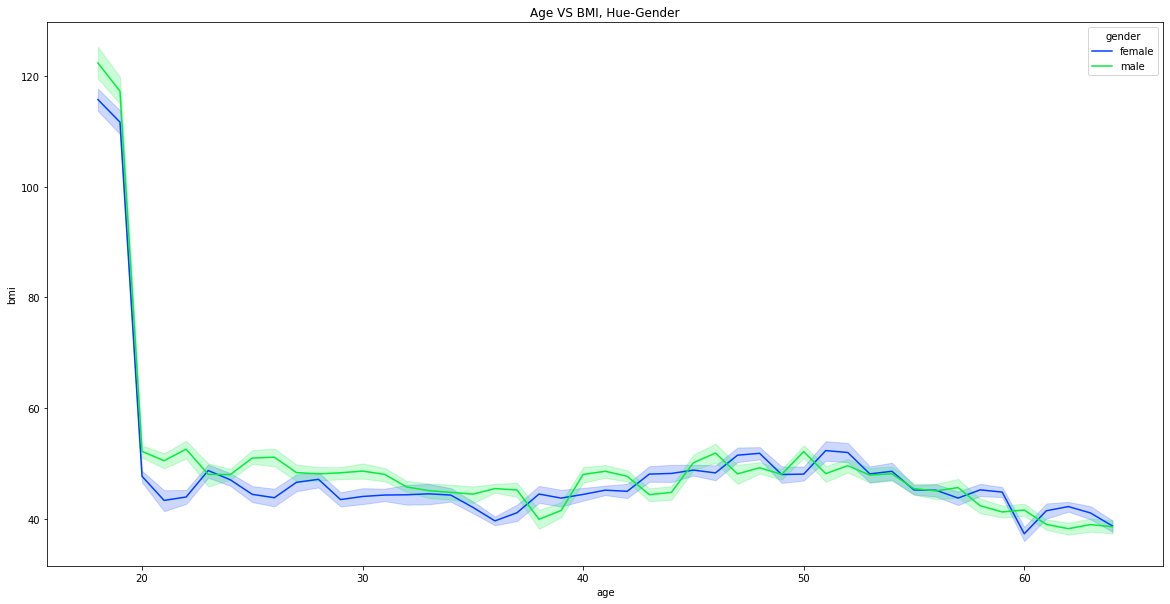

In [68]:
#Plotting Age VS BMI, Hue-Gender
plt.figure(figsize=(20,10))
sns.lineplot(x=mgi["age"],y=np.log1p(mgi["bmi"]), estimator='sum', ci=95, hue=mgi["gender"]) #Converting bmi on logarithmic scale
plt.title("Age VS BMI, Hue-Gender")

**Observations:**
*  From the above plot we can see that the BMI for people less than 20 years of age is the highest when compared to the people of remaining age groups
*  We can see that BMI for males & females has similar distribution across different age groups

Text(0.5, 1.0, 'Age VS BMI, Hue-Smoker')

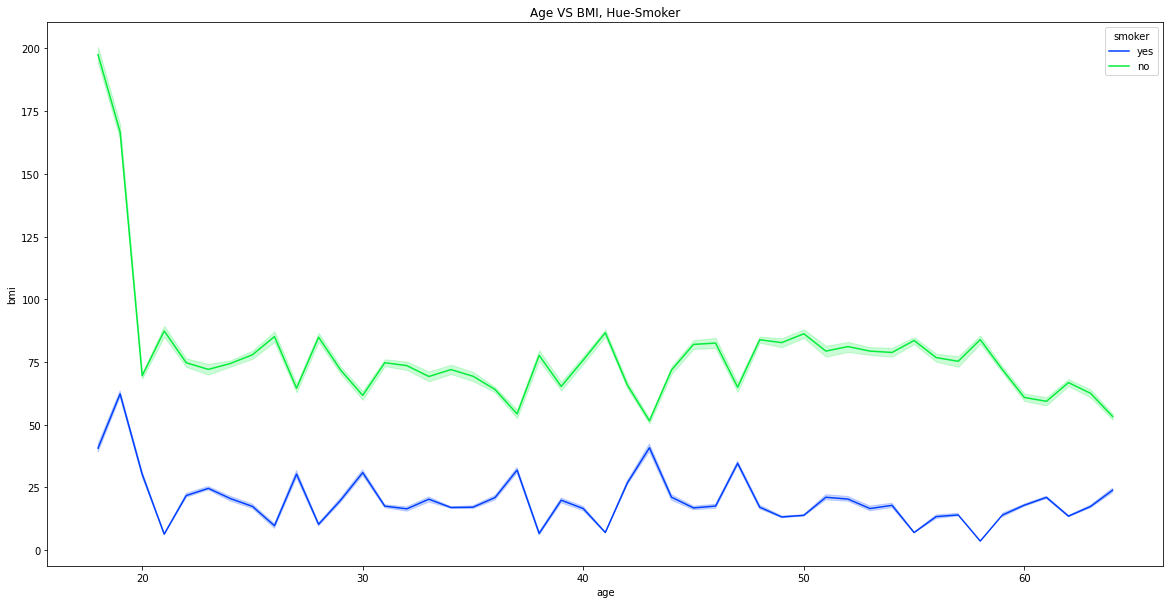

In [69]:
#Plotting Age VS BMI, Hue-Smoker
plt.figure(figsize=(20,10))
sns.lineplot(x=mgi["age"],y=np.log1p(mgi["bmi"]), estimator='sum', ci=95, hue=mgi["smoker"]) #Converting bmi on logarithmic scale
plt.title("Age VS BMI, Hue-Smoker")

**Observations:**
*  We can see that the people who smoke have less bmi when compared to the ones that don't smoke.

Text(0.5, 1.0, 'Age-Claims with Separator-Gender')

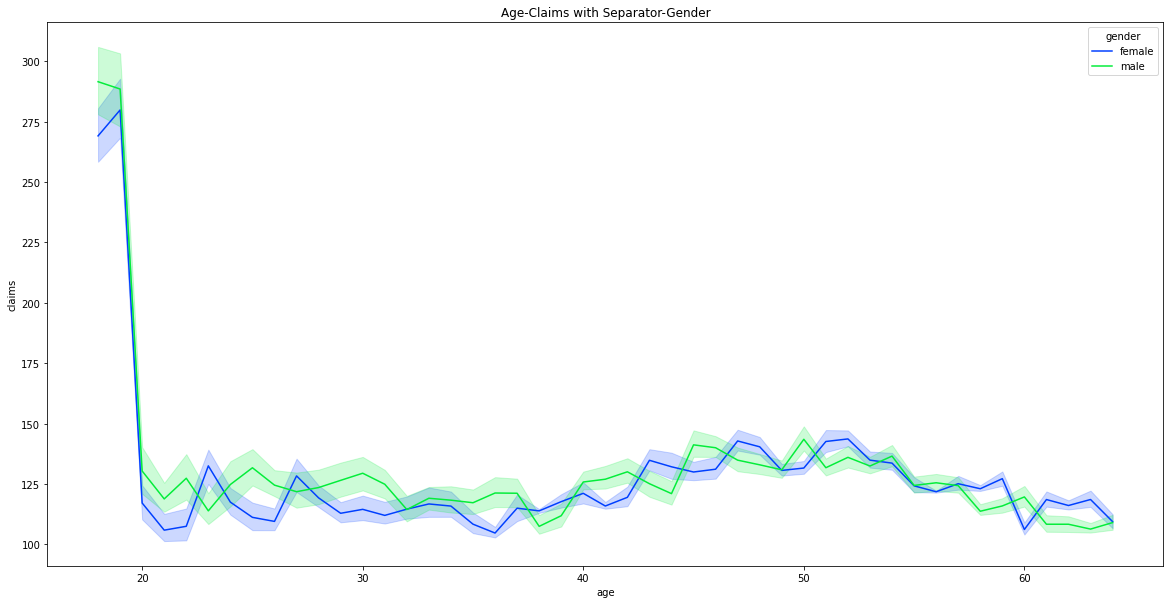

In [67]:
#Plotting Age Vs Claims, Hue-Gender
plt.figure(figsize=(20,10))
sns.lineplot(x=mgi["age"],y=np.log1p(mgi["claims"]), estimator='sum', ci=95, hue=mgi["gender"]) #Converting claims on logarithmic scale
plt.title("Age Vs Claims, Hue-Gender")

**Observations:**
*  From the above plot we can see that claims are distributed in a similar manner for both Males & Females. The highest claim is made by Males with age below 20. Also, in Females, the highest claimer is below 20 years of age.

Text(0.5, 1.0, 'Age Vs BMI, Hue-Smoker')

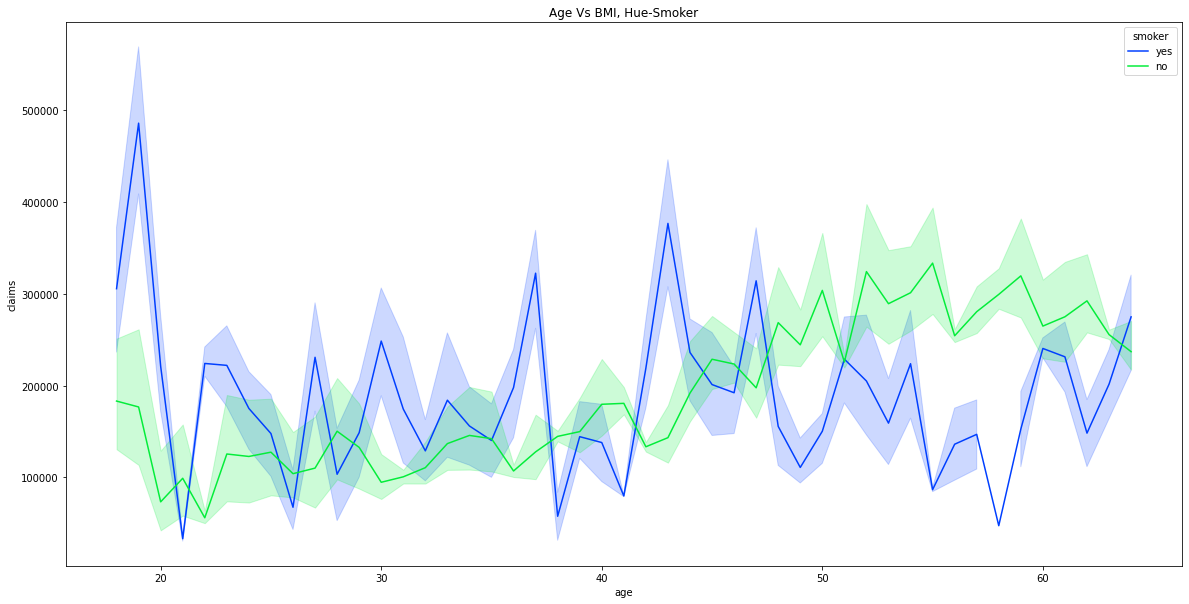

In [70]:
#Plotting Age Vs BMI, Hue-Smoker
plt.figure(figsize=(20,10))
sns.lineplot(x=mgi["age"],y=mgi["claims"], estimator='sum', ci=95, hue=mgi["smoker"])
plt.title("Age Vs BMI, Hue-Smoker")

**Observations:**
*  We can say by seeing the plot that the highest claim amount is claimed by a smoker. We can see there are many peaks in the smokers chart and we can imply that the claim amounts claimed by smokers is much higher than the non-smokers.

Text(0.5, 1.0, 'BMI-Region with Separator-Kids')

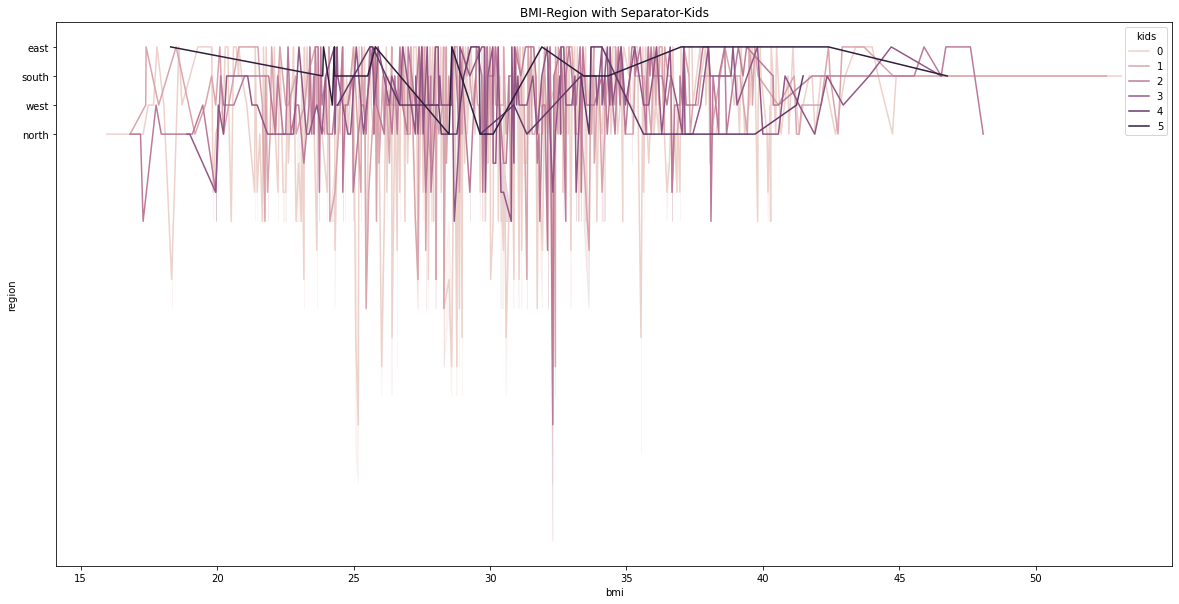

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(x=mgi['bmi'], y=mgi['region'], estimator='sum', ci=95, hue=mgi['kids'])
plt.title("BMI Vs Region, Hue-Kids")

Text(0.5, 1.0, 'BMI Vs Region, Hue-Kids')

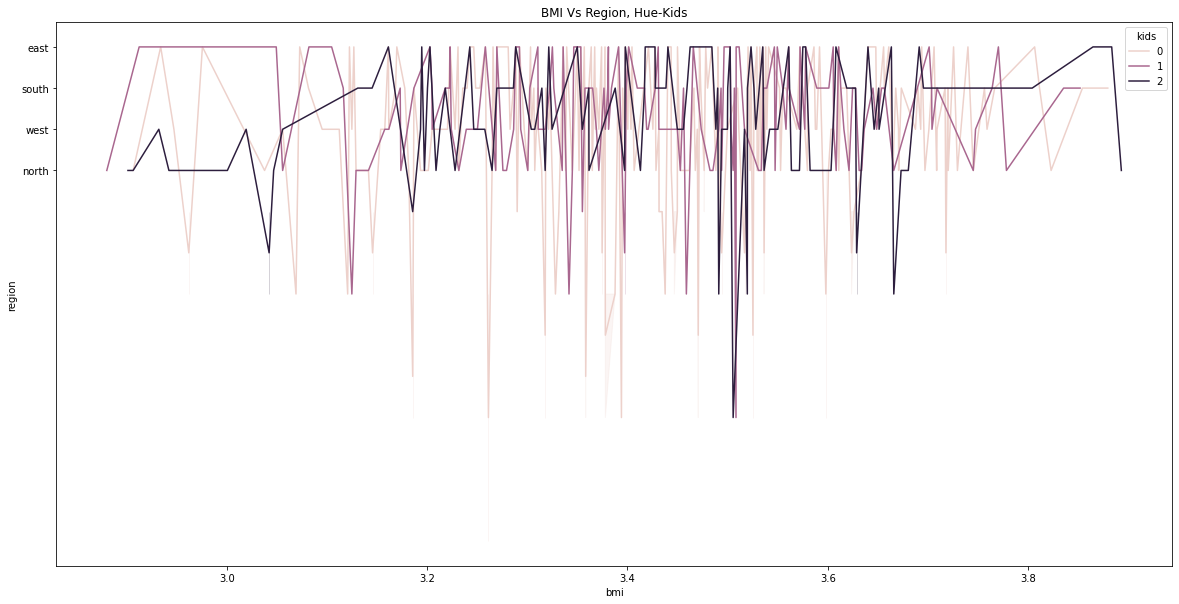

In [74]:
#Dropping Males & Kids(3,4,5)
mgi = mgi[mgi['kids']!=3]
mgi = mgi[mgi['kids']!=4]
mgi = mgi[mgi['kids']!=5]
mgi = mgi[mgi['gender']!='male']
plt.figure(figsize=(20,10))
sns.lineplot(x=np.log1p(mgi['bmi']), y=mgi['region'], estimator='sum', ci=95, hue=mgi['kids'])
plt.title("BMI Vs Region, Hue-Kids")

# ***Statistical Analysis***

# **Prove (or disapprove) that the medical claims made by the people who smoke is greater than those who don't?**

*  Ho = Medical claims made by smokers is greater than non-smokers
*  Ha = Medical claims made by non-smokers is greater than smokers

As the sample size is less than 30, we will use t-test. It will be a 2 tailed t-test. Significance level = 0.05


In [46]:
Ho = "Medical claims made by smokers is greater than non-smokers"
Ha = "Medical claims made by non-smokers is greater than smokers"

x= np.array(mgi[mgi.smoker == 'yes'].claims)

y= np.array(mgi[mgi.smoker == 'no'].claims)

t, p_value = stats.ttest_ind(x,y)
print("The p_value is : ",p_value)

if p_value < 0.05:
  print("Medical claims made by smokers is greater than non-smokers")
else:
  print("Medical claims made by non-smokers is greater than smokers")

The p_value is :  8.271435842179102e-283
Medical claims made by smokers is greater than non-smokers


# **Is the proportion of smokers different across different regions?**

*  Null Hypothesis = Ho = Region has no effect on smoking habits
*  Alternate Hypothesis = Ha = Region has an effect on smoking habits

As the sample size is less than 30, we will use t-test. It will be a 2 tailed t-test. Significance level = 0.05

In [47]:
Ho = "Region has no effect on smoking habits"
Ha = "Region has an effect on smoking habits"

#Proportion of Smokers accross different regions
mgi = mgi[mgi['smoker']!='no'] #Dropping the Non-smokers

crosstab = pd.crosstab(mgi['smoker'], mgi['region'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)
print("The p_value is: ", p_value)

if p_value < 0.05:
  print("Region has an effect on smoking habits")
else:
  print("Region has no effect on smoking habits")

The p_value is:  1.0
Region has no effect on smoking habits


In [48]:
mgi = df.copy()

In [49]:
Ho = "Region has no effect on smoking habits"
Ha = "Region has an effect on smoking habits"

crosstab = pd.crosstab(mgi['smoker'], mgi['region'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)
print("The p_value is: ", p_value.round(3))

if p_value < 0.05:
  print("Region has an effect on smoking habits")
else:
  print("Region has no effect on smoking habits")

The p_value is:  0.062
Region has no effect on smoking habits


# **Is the mean BMI of women with no children, one child & 2 children the same?**

In [50]:
mgi = df.copy()

In [51]:
mgi.head()

,age,gender,bmi,kids,smoker,region,claims
0,19,female,27.900,0,yes,east,16884.92400
1,18,male,33.770,1,no,south,1725.55230
2,28,male,33.000,3,no,south,4449.46200
3,33,male,22.705,0,no,west,21984.47061
4,32,male,28.880,0,no,west,3866.85520


In [52]:
#Dropping Males & Kids(3,4,5)
mgi = mgi[mgi['gender']!='male']
mgi = mgi[mgi['kids']!=3]
mgi = mgi[mgi['kids']!=4]
mgi = mgi[mgi['kids']!=5]
mgi.head()

,age,gender,bmi,kids,smoker,region,claims
0,19,female,27.90,0,yes,east,16884.92400
5,31,female,25.74,0,no,south,3756.62160
6,46,female,33.44,1,no,south,8240.58960
9,60,female,25.84,0,no,west,28923.13692
11,62,female,26.29,0,yes,south,27808.72510


In [53]:
#Grouping by number of children and taking the mean of them individually
mgi.groupby(['kids'])['bmi'].mean()

kids
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

# **Explanation using Statistics**

*  Null Hypothesis = Ho = Number of children has no effect on bmi
*  Alternate Hypothesis = Ha = Number of children has an effect on bmi

As the sample size is less than 30, we will use t-test. It will be a  2 tailed t-test. Significance level = 0.05

In [54]:
Ho = "Number of children has no effect on bmi"
Ha = "Number of children has an effect on bmi"

zero = mgi[mgi.kids == 0]['bmi']
one = mgi[mgi.kids == 1]['bmi']
two = mgi[mgi.kids == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero, one, two)
print("The p-value is: ", p_value.round(3))

if p_value < 0.05:
  print("Number of children has an effect on bmi")

else:
  print("Number of children has no effect on bmi")

The p-value is:  0.716
Number of children has no effect on bmi


# **BMI of females is different from that of males**

In [55]:
mgi = df.copy()

In [56]:
mgi.gender.value_counts()

male      676
female    662
Name: gender, dtype: int64

In [57]:
np.mean(mgi[mgi.gender == 'female'].bmi)

30.37774924471299

In [58]:
np.mean(mgi[mgi.gender == 'male'].bmi)

30.943128698224854

# **Prove (or disapprove) with statistical evidence that BMI of females is different from that of males**

Null Hypothesis = Ho = Mean BMI of females is same as males

Alternate Hypothesis = Ha = Mean BMI is different for both

As the sample size is less than 30, we will use t-test. It will be a  2 tailed t-test. Significance level = 0.05

In [59]:
Ho = "BMI of females is same as males"
Ha = "BMI is different for both"

#Separating BMI values of Males & Females and storing them in x & y respectively
x= np.array(mgi[mgi.gender == 'male'].bmi)

y= np.array(mgi[mgi.gender == 'female'].bmi)

t, p_value = stats.ttest_ind(x,y)
print("The p_value is : ",p_value.round(5))

if p_value < 0.05:
  print("Reject the Null Hypothesis that the BMI of females is same as males")
else:
  print("Reject the Alternate Hypothesis that BMI is different for both")

The p_value is :  0.08998
Reject the Alternate Hypothesis that BMI is different for both
